In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,synopsis
Aladdin,"The film starts with a street peddler, guiding..."
Cars,"The movie begins with two announcers, Bob Cutl..."
Finding Nemo,"Two clownfish, Marlin (Albert Brooks) and his ..."
Frozen,The Walt Disney Pictures logo and the movie ti...
Tangled,The film opens on a Wanted poster for Flynn Ri...
The Little Mermaid,"Ariel, a sixteen-year-old mermaid princess, is..."
Toy Story,A boy called Andy Davis (voice: John Morris) u...
Toy Story 3,Andy Davis (voice: John Morris) is 17 years ol...
Up,"Young Carl Fredricksen (Jeremy Leary), a quiet..."
Zootopia,"In the town of Bunnyburrow, 9 year old bunny, ..."


In [3]:
from textblob import TextBlob

pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

data['polarity'] = data['synopsis'].apply(pol)
data['subjectivity'] = data['synopsis'].apply(sub)
data

,synopsis,polarity,subjectivity
Aladdin,"The film starts with a street peddler, guiding...",0.079297,0.454815
Cars,"The movie begins with two announcers, Bob Cutl...",0.086853,0.436101
Finding Nemo,"Two clownfish, Marlin (Albert Brooks) and his ...",0.041592,0.418741
Frozen,The Walt Disney Pictures logo and the movie ti...,0.095785,0.472985
Tangled,The film opens on a Wanted poster for Flynn Ri...,0.041198,0.463482
The Little Mermaid,"Ariel, a sixteen-year-old mermaid princess, is...",0.057299,0.393215
Toy Story,A boy called Andy Davis (voice: John Morris) u...,0.063423,0.416290
Toy Story 3,Andy Davis (voice: John Morris) is 17 years ol...,0.045773,0.425513
Up,"Young Carl Fredricksen (Jeremy Leary), a quiet...",0.045565,0.407527
Zootopia,"In the town of Bunnyburrow, 9 year old bunny, ...",0.023512,0.413612


In [4]:
data_clean = pd.read_pickle('data_clean.pkl')

data_clean['polarity'] = data_clean['synopsis'].apply(pol)
data_clean['subjectivity'] = data_clean['synopsis'].apply(sub)
data_clean

,synopsis,polarity,subjectivity
Aladdin,the film starts with a street peddler guiding ...,0.083836,0.477531
Cars,the movie begins with two announcers bob cutla...,0.077923,0.434574
Finding Nemo,two clownfish marlin and his wife coral admi...,0.037587,0.426540
Frozen,the walt disney pictures logo and the movie ti...,0.094541,0.471770
Tangled,the film opens on a wanted poster for flynn ri...,0.041784,0.468292
The Little Mermaid,ariel a sixteenyearold mermaid princess is dis...,0.064780,0.372144
Toy Story,a boy called andy davis uses his toys to act ...,0.066117,0.418415
Toy Story 3,andy davis is years old and is heading off t...,0.049407,0.418439
Up,young carl fredricksen a quiet bespectacled b...,0.030949,0.406830
Zootopia,in the town of bunnyburrow year old bunny jud...,0.022158,0.414835


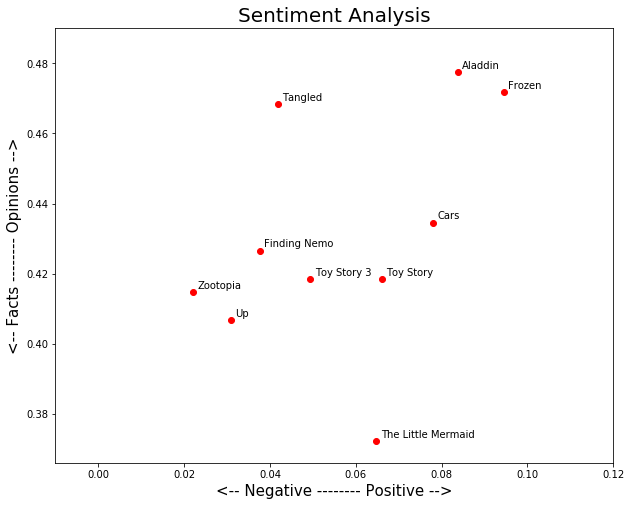

In [5]:
import matplotlib.pyplot as plt
movies = list(data_clean.index)
plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data_clean.index):
    x = data_clean.polarity.loc[movie]
    y = data_clean.subjectivity.loc[movie]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, movies[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [6]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [9]:
list_pieces = []
for t in data_clean.synopsis:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['the film starts with a street peddler guiding us through the streets of the fictional arabian city of agrabah after trying to sell us on his wares he pulls out an old oil lamp claiming it once changed the course of a young mans life a young man who like this lamp was more than what he seemed a diamond in the roughthe peddler then begins to tell us a tale beginning on a dark night where the sultans grand vizier jafar meets with a thief named kassim kassim hands over half of a gold scarab beetle of which jafar has the second one putting them together the beetle flies off before causing a giant tigers head to rise from the sand the cave of wondersjafar sends kassim to enter telling him to retrieve a lamp inside however upon approaching the tigers head it speaks that only one may enter one whose worth lies far within the diamond in the rough kassim still attempts to enter upon jafars orders but upon entering the tigers mouth it bites down on the thief closing off the entrance way it is 

In [10]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

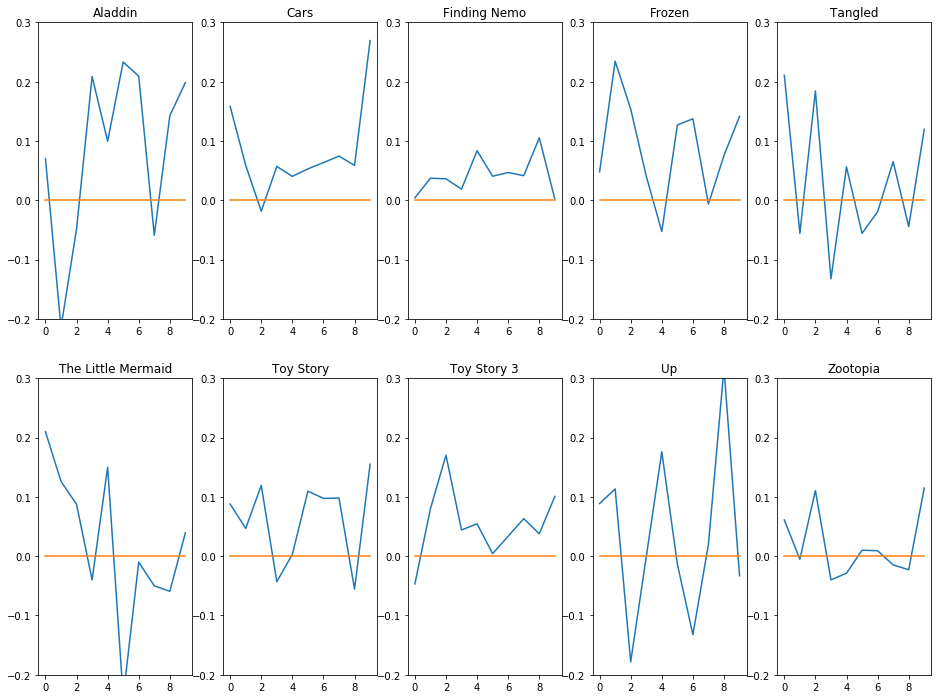

In [11]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data_clean.index):    
    plt.subplot(2, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(movies[index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()